In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hakgyunhong","key":"50913cd2335ebf13e16010fcf0c55c45"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d camnugent/sandp500

 52% 10.0M/19.3M [00:00<00:00, 104MB/s]
100% 19.3M/19.3M [00:00<00:00, 142MB/s]


In [13]:
!unzip sandp500.zip
!ls

Archive:  sandp500.zip
  inflating: all_stocks_5yr.csv      
  inflating: getSandP.py             
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv  
  inflating: individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv  
  inflating: individual_stocks_5yr/individual_stocks_5yr/.DS_Store  
  inflating: individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv  
  inflating: individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv  
  inflating: individual_stocks_5yr/individual_stocks_5yr/AAP_data.csv  
  inflating: individual_stocks_5yr/individual_stocks_5yr/ABBV_data.csv  
  inflating: individual_stocks_5yr/individual_stocks_5yr/ABC_data.csv  
  inflating: individual_stocks_5yr/individual_stocks_5yr/AB

In [5]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.5/920.5 kB 14.6 MB/s eta 0:00:00


In [6]:
import os
import pandas as pd
import numpy as np
import random
import itertools
from arch import arch_model
from scipy.stats import shapiro
from scipy.stats import probplot
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
%matplotlib inline


,PCLN,EMR,ARNC,BEN,TXN,FLS,MDLZ,STZ
date,,,,,,,,
2013-02-08,700.83,57.50,26.82,46.7333,34.28,52.5799,27.76,31.85
2013-02-11,696.11,57.73,26.61,46.7200,33.69,52.5533,27.75,31.32
2013-02-12,703.38,58.08,27.09,47.4166,33.56,53.0299,27.68,31.49
2013-02-13,704.17,58.10,27.30,47.5166,33.72,53.3399,27.75,31.88
2013-02-14,705.62,58.41,27.87,48.1433,33.79,53.3233,26.57,43.75


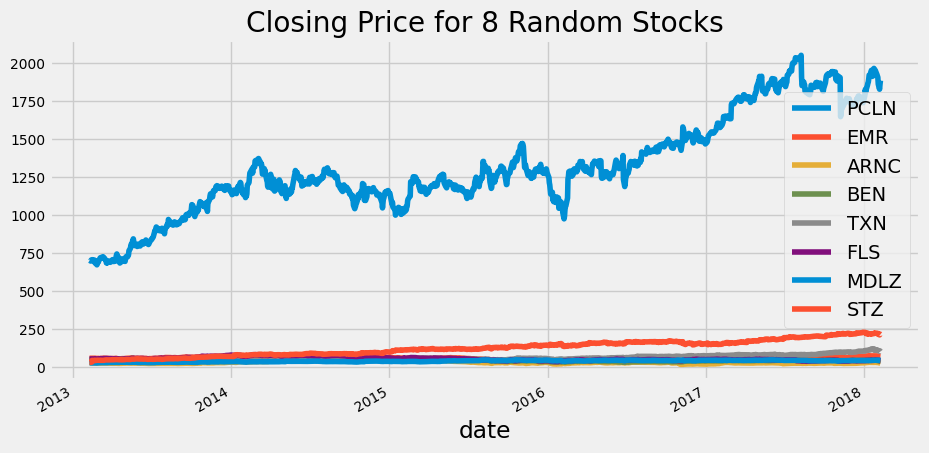

In [17]:
#path = '/content/individual_stocks_5yr/individual_stocks_5yr'
path = '/content/individual_stocks_5yr/individual_stocks_5yr'
csvs = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]

df = pd.DataFrame()
for file in random.sample(range(1,len(csvs)),8):
  stock_df=pd.read_csv(csvs[file])
  stock_df.index = pd.DatetimeIndex(stock_df.date)
  name=stock_df['Name'].iloc[0]
  df[name] = stock_df['close']

df.plot(figsize=(10,5), title='Closing Price for 8 Random Stocks')
df.head()


# Heteroskedasticity

- We can think about an idealized time series as a set of observations choosen independently and from identical distributions. Understanding this series is as easy as estimating the parameters of the distribution.
This is the idea behind stationarity.
Once a time series is stationary, we can learn the parameters of the distribution and forecast, but rarely is it that easyy.

- If we return to the idealized time series, heteroskedasticity is when the variance of the underlying distribution used to construct our time series changes as a function of time. A common appearance of heteroskedasticity is a time series whose variance increases with time, growing outward in a conal pattern. Small amounts of heteroskedasticity can sometimes be masked by a Box-Cox transformation, which makes the data distribution more normal, In our forecasts of the S&P500, not only are our changes in variance too great to mask but the variance at step x_t is conditional on the variance of past time steps, x_t-1, This is called conditional heteroskedasticity or volatility clustering

# Volatility Clustering

- Volatility clustering is the behavior behind the familiar jagged peaks of financial time series. When we look at the plot above we can see there are periods of high and low volatility. Periods where a positive feedback loop forms and changed in variance give rise to greater changes in variance punctuated by periods of relative calm. The ARCH and GARCH models, which we'll introduce shortly, are designed to model the variance for volatile time series. Note, these models do not forecast estimated values. The ARCH and GARCH models specifically capture the expected variance of the residuals from another model. To forecast financial markets we would use ARCH and GARCH after applying another model like ARIMA first.

# Autoregressive Conditional Heteroskedasticity (ARCH)

- If you're familiar with AR Models, ARCH is easy to understand. In an AR model the current value is dependoent on 'p' previous timesteps where 'p' lagged values were highly correlated with the current tiemstep. With ARCH, the variance of the current tiem step is dependent on 'p' lagged squered standard error terms, with coefficients 'Alpha'. The standard error is the difference between the observed and predicted value from another model.

- If the volatility tends to cluster then recent large squared errors are likely to lead to large variance, and more large squared errors. Like fitting an AR model we can llok at PACF and ACF plots to see where our series is autocorrelated and use that to choose a value for our parameter, 'p'. If we have an ARCH(1) or a first order ARCH model we assume the series is stationary except for the change in variance. We often use ARCH models in conjunction with another AR or ARMA model where we would pass the ARCH model the squared residuals form the ARMA model. we can also pass ARCH a mean process, as in the case of this kernel where we will pass the percent changes in stock closing value which is a series that will hover around 0.

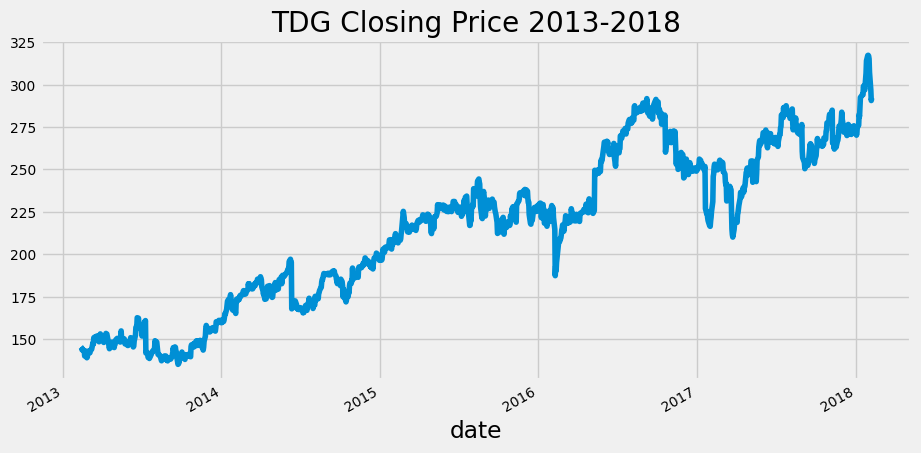

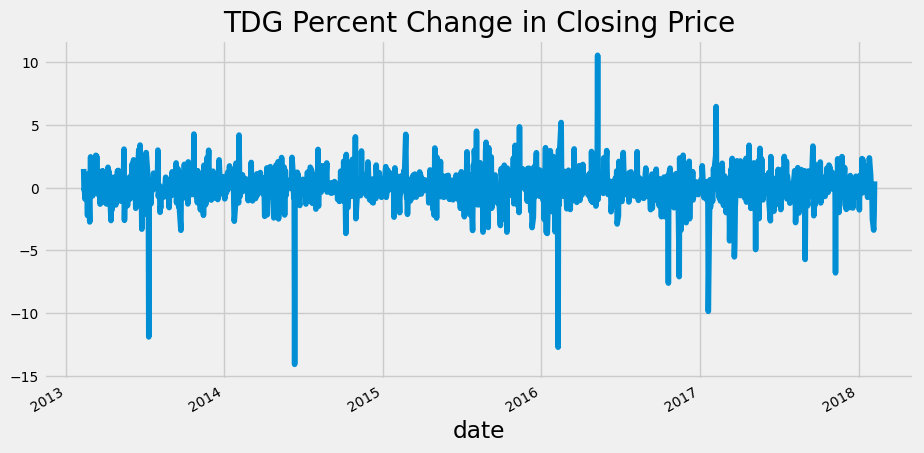

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


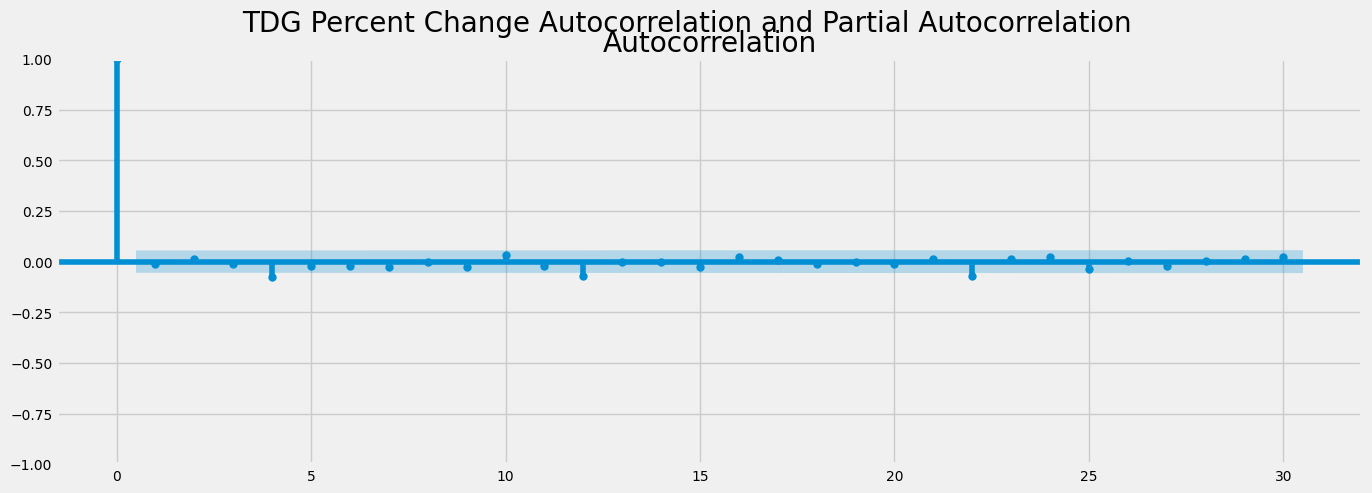

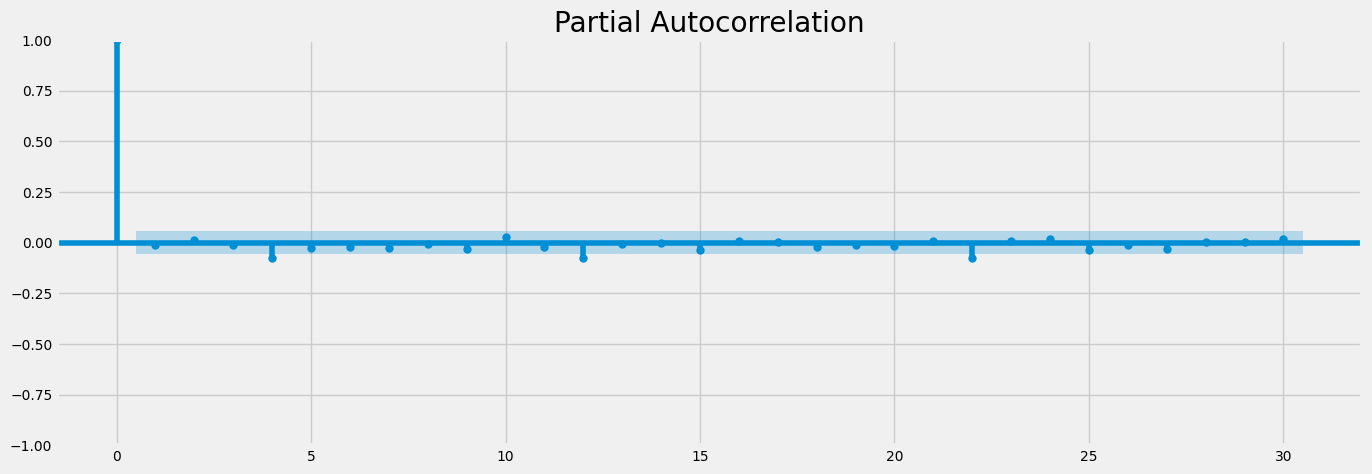

In [19]:
stock='TDG'
df = pd.read_csv(f'/content/individual_stocks_5yr/individual_stocks_5yr/{stock}_data.csv')
df.index = pd.DatetimeIndex(df.date)
df=df.drop(columns=['open','high','low','volume','date','Name'])
df['pct_change'] = 100*df['close'].pct_change()
df.dropna(inplace=True)
df['close'].plot(figsize=(10,5), title=f'{stock} Closing Price 2013-2018')
plt.show()

df['pct_change'].plot(figsize=(10,5), title=f'{stock} Percent Change in Closing Price')
plt.show()

acf = plot_acf(df['pct_change'], lags=30)
pacf = plot_pacf(df['pct_change'], lags=30)

acf.suptitle(f'{stock} Percent Change Autocorrelation and Partial Autocorrelation', fontsize=20)
acf.set_figheight(5)
acf.set_figwidth(15)
pacf.set_figheight(5)
pacf.set_figwidth(15)

plt.show()

# Ljung-Box Test

- Ljung-Box is a test for autocorrelation that we can use in tandem with our ACF and PACF plots. the Ljung-Box test takes our data, optionally either lag values to consider. and wheter to compute the Box-Pierce statistic. Ljung-Box and Box-Pierce are two simliar test statistics, Q, that are compared against a chi-squared distribution to determine if the series is white noise. We might use the Ljung-Box test on the residuals of our model to look for autocorrelation, ideally our residuals would be white noise

- H0 : The data are independently distributed, no autocorrelation.
- Ha : the data are not independently distributed; they exhibit serial correlation.

In [29]:
ljung_res = acorr_ljungbox(df['pct_change'], lags=40, boxpierce=True)
print(ljung_res)
print(f'Ljung-Box p-values: {ljung_res.iloc}')
print(f'\nBox-Pierce p-values: {ljung_res.iloc(3)}')

      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.107904   0.742543   0.107647   0.742839
2    0.260044   0.878076   0.259304   0.878401
3    0.455559   0.928541   0.454043   0.928866
4    7.702393   0.103109   7.666369   0.104593
5    8.427964   0.134174   8.387908   0.136113
6    9.134358   0.166162   9.089818   0.168589
7    9.981917   0.189601   9.931323   0.192499
8    9.989090   0.265793   9.938438   0.269373
9   10.816118   0.288524  10.758247   0.292645
10  12.141226   0.275716  12.070735   0.280350
11  12.605747   0.319872  12.530463   0.325117
12  18.787594   0.093785  18.643623   0.097500
13  18.789417   0.129779  18.645424   0.134514
14  18.800572   0.172710  18.656437   0.178497
15  19.821737   0.178878  19.663824   0.185212
16  20.499516   0.198560  20.331921   0.205642
17  20.541936   0.247452  20.373702   0.255563
18  20.767715   0.291294  20.595897   0.300288
19  20.770061   0.349644  20.598203   0.359421
20  20.945413   0.400352  20.770494   0.410750
21  21.183037

ValueError: ignored

In [30]:
def ts_plot(residuals, stan_residuals, lags=50):
  residuals.plot(title='GARCH Residuals', figsize=(15,10))
  plt.show()
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
  ax[0].set_title('GARCH Standardized Residuals KDE')
  ax[1].set_title('GARCH Standardized Residuals Probability Plot')

  residuals.plot(kind='kde', ax=ax[0])
  probplot(stan_residuals, dist='norm', plot=ax[1])
  plt.show()
  acf=plot_acf(stan_residuals, lags=lags)
  pacf=plot_pacf(stan_residuals, lags=lags)

  acf.suptitle('GARCH Model Standardized Residual Autocorrelation', fontsize=20)
  acf.set_figheight(5)
  acf.set_figwidth(15)
  pacf.set_figheight(5)
  pacf.set_figwidth(15)
  plt.show()

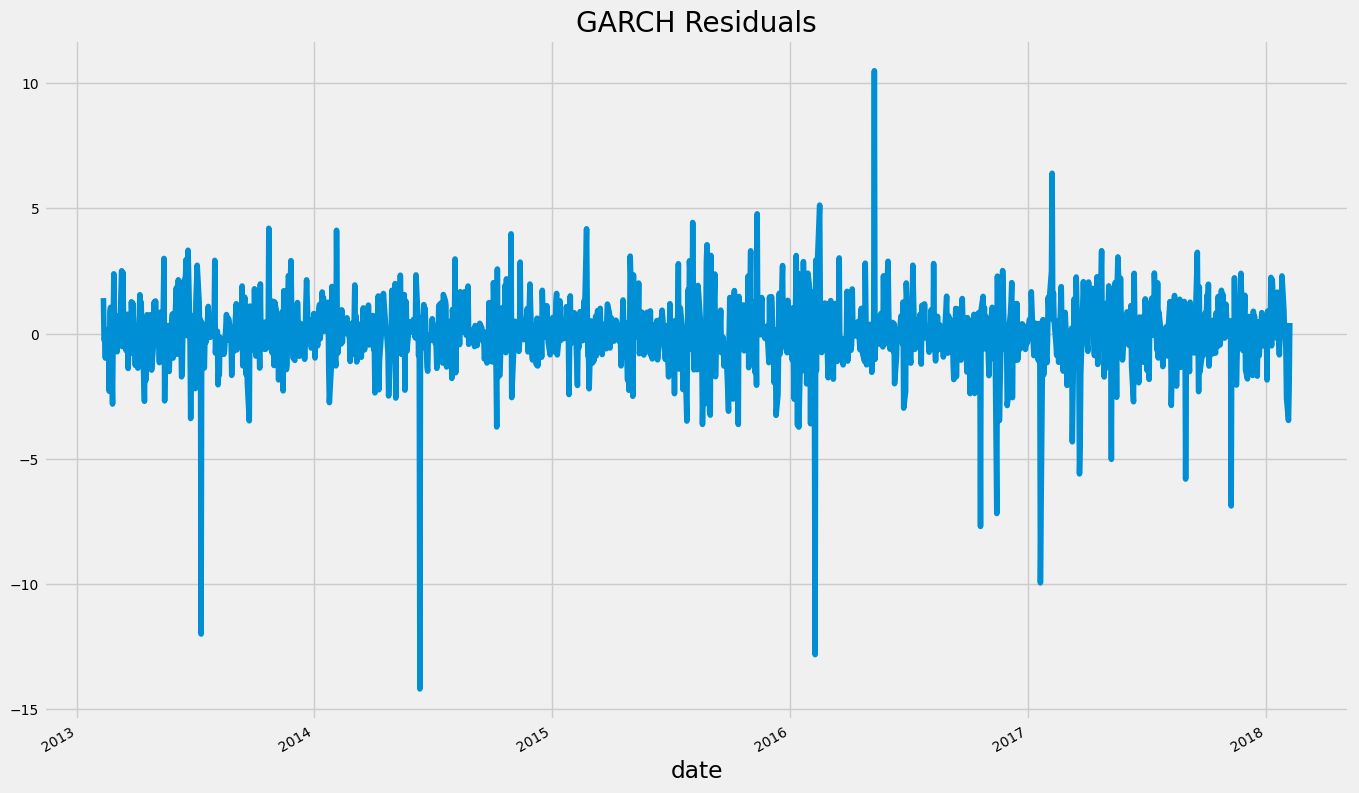

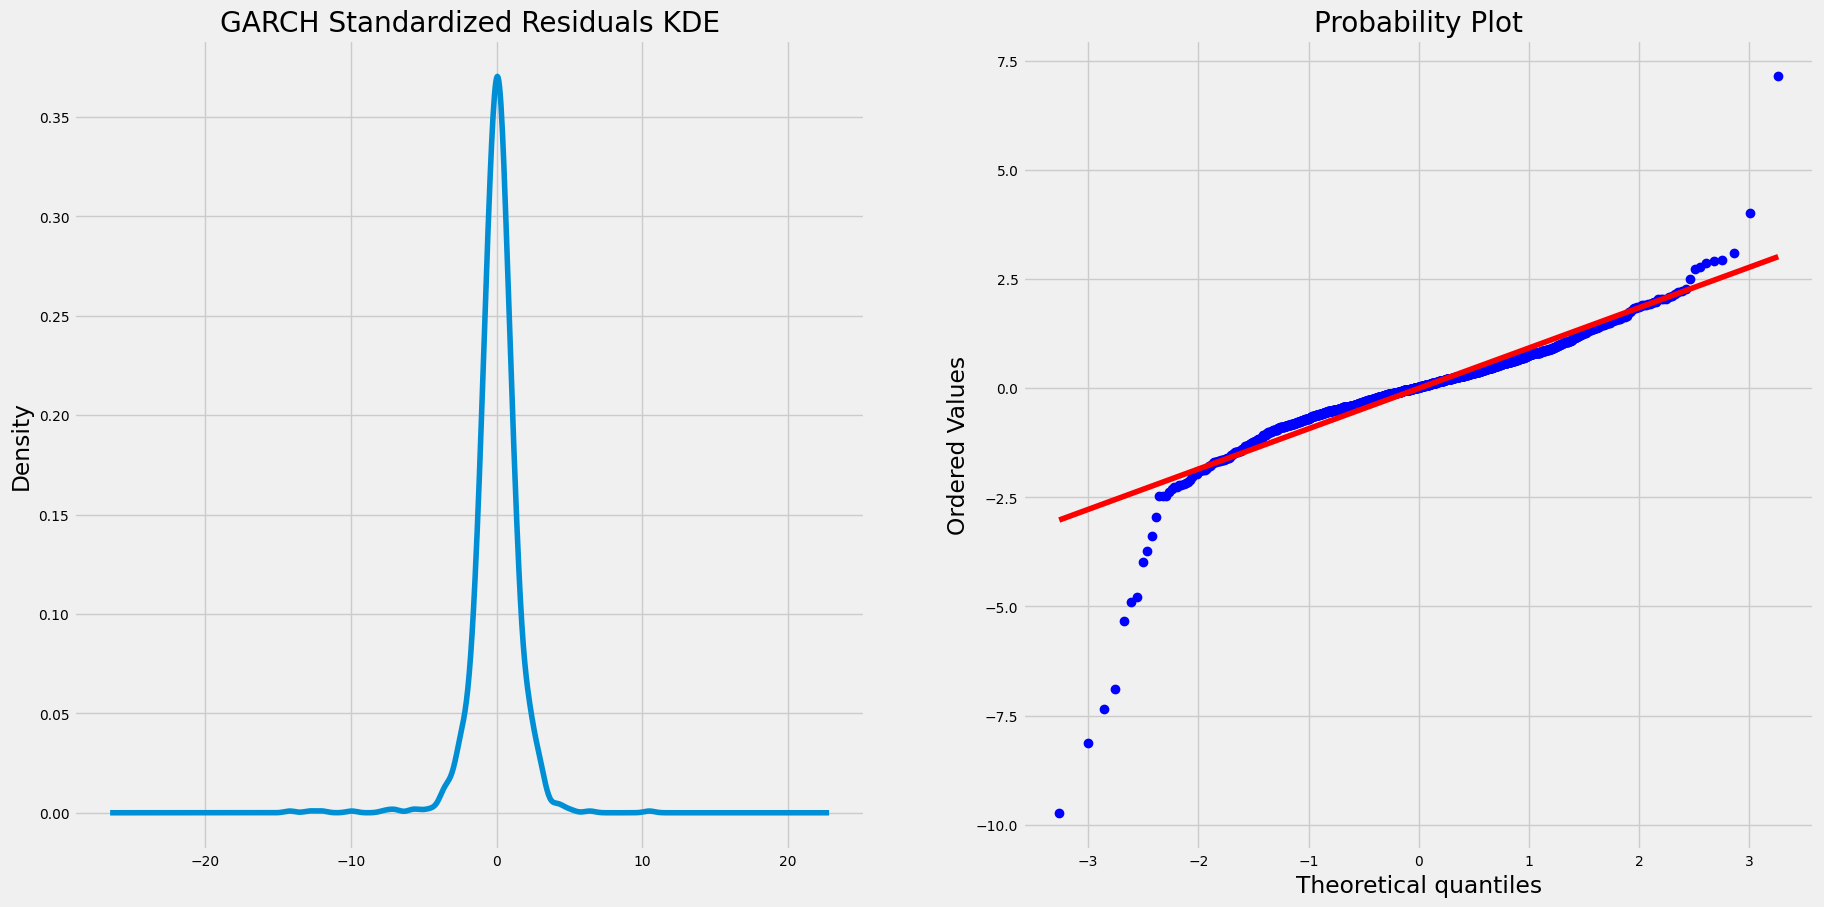

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


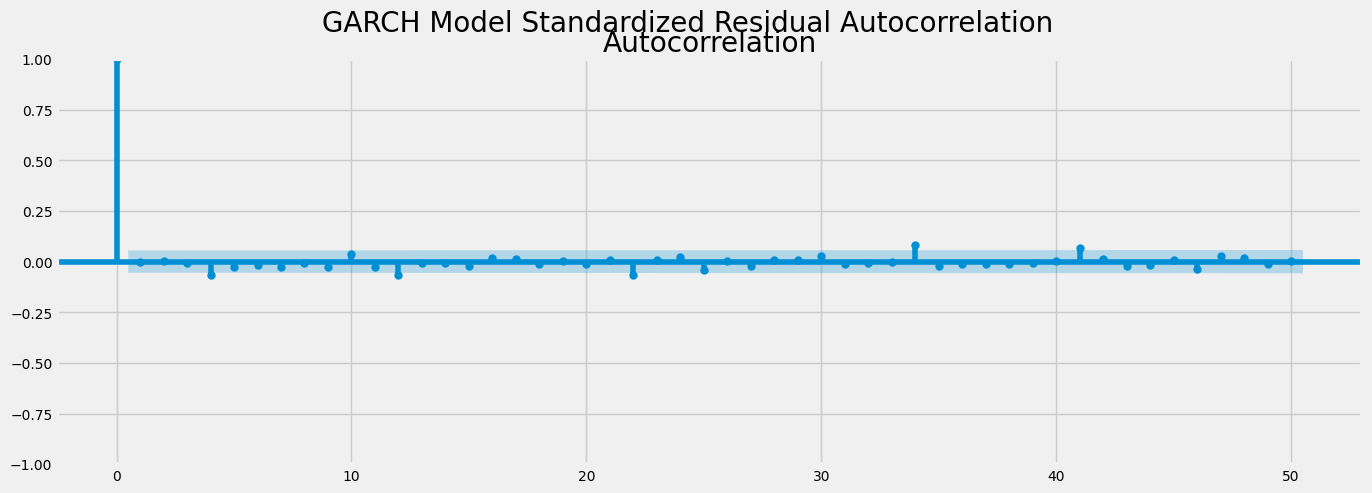

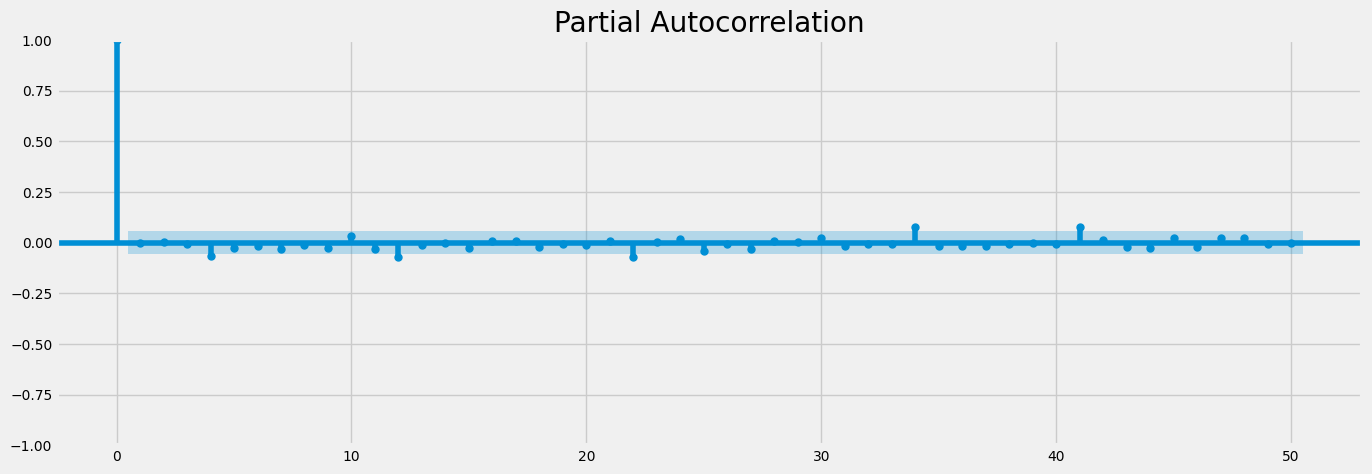

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             pct_change   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2307.11
Distribution:                  Normal   AIC:                           4622.21
Method:            Maximum Likelihood   BIC:                           4642.76
                                        No. Observations:                 1258
Date:                Sun, Apr 16 2023   Df Residuals:                     1257
Time:                        11:31:01   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0755  4.505e-02      1.677  9.359e-02 [-1.276e-02,  0.164]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.9758      0.596      1.636      0.102    [ -0.193,  2.145]
alpha[1]       0.0632  9.635e-02      0.656      0.512    [ -0.126,  0.252]
beta[1]        0.5220      0.305      1.711  8.707e-02 [-7.592e-02,  1.120]
===========================================================================

Covariance estimator: robust
"""

In [31]:
garch = arch_model(df['pct_change'], vol='GARCH', p=1 ,q=1, dist='normal')
fgarch = garch.fit(disp='off')
resid=fgarch.resid
st_resid = np.divide(resid, fgarch.conditional_volatility)
ts_plot(resid, st_resid)
fgarch.summary()

In [33]:
arch_test = het_arch(resid, maxlag=50)
shapiro_test = shapiro(st_resid)

print(f'Lagrange multiplier p-value: {arch_test[1]}')
print(f'F test p-value: {arch_test[3]}')
print(f'Shapiro-Wilks p-value: {shapiro_test[1]}')

Lagrange multiplier p-value: 0.9999999997772876
F test p-value: 0.9999999998466416
Shapiro-Wilks p-value: 1.812616550134989e-32


<ipython-input-33-2b81c52367aa>:1: FutureWarning: the 'maxlag'' keyword is deprecated, use 'nlags' instead.
  arch_test = het_arch(resid, maxlag=50)


# GARCH Results

In [34]:
def gridsearch(data, p_rng, q_rng):
  top_score, top_results = float('inf'), None
  top_models=[]
  for p in p_rng:
    for q in q_rng:
      try:
        model = arch_model(data, vol='GARCH', p=p, q=q, dist='normal')
        model_fit = model.fit(disp='off')
        resid = model_fit.resid
        st_resid=np.divide(resid, model_fit.conditional_volatility)
        results = evaluate_model(resid, st_resid)
        results['ATC'] = model_fit.aic
        results['params']['p']=p
        results['params']['q']=q
        if results['AIC']<top_score:
          top_score = results['AIC']
          top_results = results
        elif results['LM_pvalue'][1] is False:
          top_models.append(results)
      except:
        continue
  top_models.append(top_results)
  return top_models

def evaluate_model(residuals, st_residuals, lags=50):
  results={
      'LM_pvalue':None,
      'F_pvalue':None,
      'SW_pvalue':None,
      'AIC':None,
      'params':{'p':None,'q':None}
  }

  arch_test = het_arch(residuals, maxlag=lags)
  shap_test = shapiro(st_residuals)

  results['LM_pvalue'] = [arch_test[1],arch_test[1]<0.05]
  results['F_pvalue'] = [arch_test[3],arch_test[3]<0.05]
  results['SW_pvalue'] = [shap_test[1],shap_test[1]<0.05]
  return results

In [35]:
p_rng = range(0,30)
q_rng = range(0,40)
df['dif_pct_change']=df['pct_change'].diff()
top_models = gridsearch(df['dif_pct_change'], p_rng, q_rng)
print(top_models)

[None]
